### L04 Read and Plot COMSOL Results (Basic)

By Yan Zhan (2020)

This tutorial will show you how to export 2d datesets (e.g., surface, cross-section) from COMSOL to text files, and how to use Python read and visualize the data.

### Export data from COMSOL (surface)


__*open "COMSOLexample.mph"*__

- Step 1. create surface dataset:

__*Results > Datasets (right click) > Surface*__

<img src="img/s01_createSurface.png" width="200">

- Step 2. select the surface:

__*Selections (select the surface you want to export the data)*__

<img src="img/s02_selectSurface.png" width="700">

- Step 3. create an export:

__*Results > Export (right click) > Data*__

<img src="img/s03_CreateExport.png" width="300">

- Step 4. select the surface dataset we have created to export:

__*at "Data > Dateset" select "Surface 1"*__

<img src="img/s04_selectSurfaceDateSet.png" width="500">

- Step 5. specify the grid and file name:

__*AT "File type:" choose "Text"*__

__*AT "Filename:" type "surface_w.txt"*__ (can be other names)

__*AT "Points to evaluate in:" choose "Grid"*__

__*AT "Data format:" choose "Grid"*__

__*AT "x: and y:" type "range(-10e3,50,10e3)"*__ (you can specify the grid here)

<img src="img/s05_selectFilename.png" width="500">

- Step 6. Click "Export" at top-left of the Setting

#### The text file looks like:

        % Model:              COMSOLexample.mph
        % Version:            COMSOL 5.5.0.359
        % Date:               May 28 2020, 10:29
        % Dimension:          2
        % Nodes:              160801
        % Expressions:        1
        % Description:        Displacement field, Z component
        % Length unit:        m
        % Grid
        -10000                    -9950                    -9900 ...
        -10000                    -9950                    -9900 ...
        % Data
        % w (m)
        6.831129299609568E-4      7.008944973020543E-4 ...
        ...
        
 - The lines starting with percent sign "%" are headers.
 
 - In the Grid type files, after "% Grid", there are two 1d arrays for x, and y coordinates.
 
 - After "% w (m)" which is the data name according to your selection, there is a 2D matrix with the data.
 
         a11    a12    ...    a1m
         a21    a22    ...    a2m
         ...    ...    ...    ...
         an1    an2    ...    anm

### Read the results txt files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Function for reading 2d grid data from COMSOL

In [2]:
def readGrid2d(filename):
    # find location of x,y grid and data
    iloc = []
    with open(filename, 'r') as f:
        n = -1
        icom = 0
        for line in f:
            n += 1
            if line[0] == "%":
                icom = 1
            else:
                if icom == 1:
                    icom = 0
                    iloc.append(n)
    # read x coordinate
    x = np.loadtxt(filename, skiprows=iloc[0], max_rows=1)
    # read y coordinate
    y = np.loadtxt(filename, skiprows=iloc[0]+1, max_rows=1)
    # read data (2d Matrix)
    dat = np.loadtxt(filename, skiprows=iloc[1])
    
    return x, y, dat

### Read and plot surface deformation data

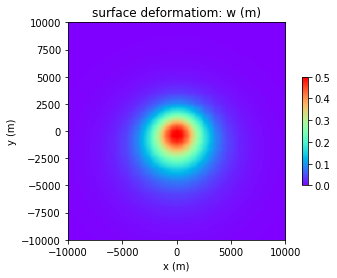

In [3]:
# file name
filename = "surface_w.txt"
# read the data
x, y, w = readGrid2d(filename)

# plot data
plt.imshow(w, extent=[x.min(), x.max(), y.min(), y.max()],
           cmap=cm.rainbow, origin='low',
           vmin=0, vmax=0.5
          )
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("surface deformatiom: w (m)")
plt.colorbar(shrink=0.5)
plt.show()

### Export data from COMSOL (cross-section)

Similar to the exporting surface data, we create a cut-plane dataset type, and export it with "Export > Data" options.

- Step 1. create surface dataset:

__*Results > Datasets (right click) > Cut Plane*__

<img src="img/c01_createCutPlane.png" width="200">

- Step 2. specify the cut plane:

__*AT "Plane:", select "YZ-planes"*__ (can be other planes)

__*AT "X-coordinate:", type "0"*__ (can be other values, according to the location of the cross-section)

<img src="img/c02_selectPlane.png" width="700">

- Step 3. create an export:

__*Results > Export (right click) > Data*__ (same as the previous)

__*AT "File type:" choose "Text"*__

__*AT "Filename:" type "cutPlane_w.txt"*__ (can be other names)

__*AT "Points to evaluate in:" choose "Grid"*__

__*AT "Data format:" choose "Grid"*__

__*AT "x:" type "range(-10e3,50,10e3)"*__ (you can specify the grid here)

__*AT "y:" type "range(-10e3,50,0)"*__ (Note: y axis at the cross-section is the depth)

__*Click "Export"*__

<img src="img/c03_Export.png" width="500">

### Read and vertical deformation at YZ cut plane

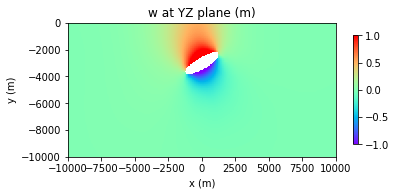

In [8]:
# file name
filename_cp = "cutPlane_w.txt"
# read the data
xcp, ycp, wcp = readGrid2d(filename_cp)

# plot data
plt.imshow(wcp, extent=[xcp.min(), xcp.max(), ycp.min(), ycp.max()],
           cmap=cm.rainbow, origin='low',
           vmin=-1, vmax=1
          )
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("w at YZ plane (m)")
plt.colorbar(shrink=0.5)
plt.show()